# Classifiers with PCA

## 1- Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

In [2]:
# setting plt layout
plt.ion()

## 2- Importing data

In [3]:
dataset = pd.read_csv('C:/Users/matlp/Desktop/Nova Pasta/KaggleBC/data.csv')

#### Splitting independent and target variables

In [4]:
X = dataset
X = X.drop(X.columns[[1, 32]], axis=1)
y = dataset[['diagnosis']]

#### processing target variable

M = 1,
B = 0

In [5]:
y = y.replace('M', 1).replace('B', 0)


In [6]:
X = X.drop(X.filter(regex='^(?=(radius|perimeter)).*', axis=1).columns, axis=1)

##### Splitting CV and test datasets

Further analysis will be based only on CV

In [7]:
## Separating CV and test datasets
X_cv, X_test, y_cv, y_test = tts(X, y, test_size = 0.2, random_state=1)

## 3- PCA for dimension reduction

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### Remamber to scale the features

In [33]:
SC = StandardScaler()
X_cv_N = pd.DataFrame(SC.fit_transform(X_cv), columns=X_cv.columns)
X_test_N = pd.DataFrame(SC.transform(X_test), columns=X_test.columns)

,id,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.400922,0.297085,0.903128,0.526420,0.488082,0.379781,0.981747,0.663632,-0.302590,-0.611995,...,-0.771031,-0.175329,-0.046983,0.754906,0.724632,0.758927,0.284225,1.218398,0.298119,0.083807
1,0.356446,-1.140982,1.746022,0.286087,0.534308,1.351402,1.389686,-0.008492,-0.579773,-0.772190,...,-0.357414,0.467798,-1.438180,1.135042,0.237388,-0.330625,0.626789,0.697164,-0.885950,-0.412347
2,-0.251424,-1.127329,-1.154826,-1.916968,-1.423329,-1.072274,-1.171440,-0.085621,0.835949,0.139705,...,0.785475,-0.602995,-0.896982,-1.033921,-1.512633,-1.317883,-1.261384,-1.522338,0.180732,-0.336571
3,-0.245555,-1.197867,-0.559306,-1.113672,-0.516737,-0.265180,-0.615972,-0.607160,-0.175920,-0.685824,...,-0.157862,0.289573,-1.021139,-0.622836,-1.332623,-0.084264,0.173957,-0.364720,-0.353460,0.276857
4,-0.245541,-1.002181,-0.539704,-0.695638,-1.143089,-0.855138,-0.737897,-0.882620,-0.840564,-0.551921,...,1.110805,-0.863644,-1.409529,-0.617453,-1.233370,-1.220114,-1.092356,-1.013948,-0.998233,-1.437133


In [24]:
pca = PCA()
pca.fit(X_cv_N)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### Percentual of explained variance of each new dimension

We can use this to choose number of dimensions to be considered

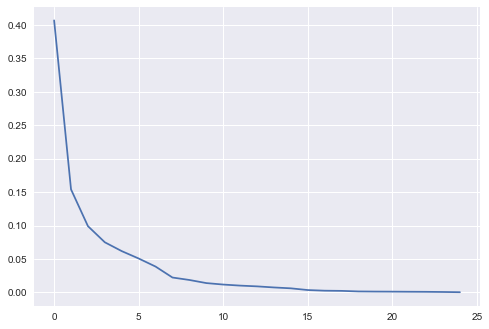

In [25]:
plt.figure
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [26]:
X_pca3 = pca.transform(X_cv_N)

In [27]:
X_pca3 = pd.DataFrame(X_pca3[:,:5], columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5'])
col = X_pca3.columns

In [28]:
X_pca3.head()

,pca1,pca2,pca3,pca4,pca5
0,1.902532,-1.314455,-0.732647,0.454484,-0.350837
1,1.993485,-0.906674,1.204597,3.224281,-0.424210
2,-4.372819,1.324844,-0.080894,0.140793,-0.244861
3,-1.563624,0.528454,-0.172437,1.267219,1.983262
4,-3.856023,0.121948,0.892625,1.593756,-0.570273


##### Visualizing how the PCA dimensions and target variable are related

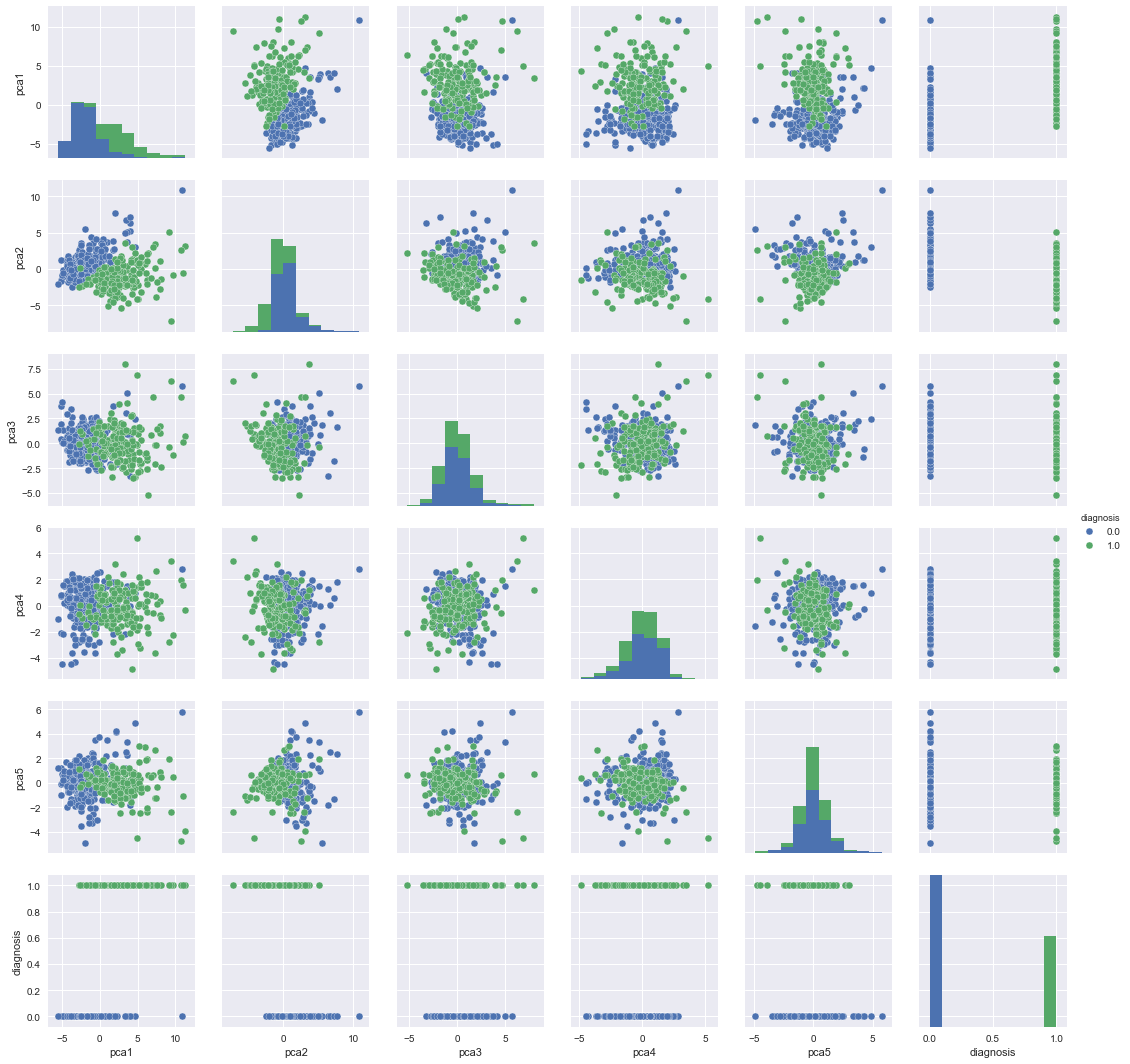

In [29]:
datas = pd.DataFrame(np.concatenate((X_pca3.values,y_cv.values), axis=1), columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5','diagnosis'])
sns.pairplot(datas, hue='diagnosis')

Compared to top 5 feature importances from RandomForestClassifier on scaled data

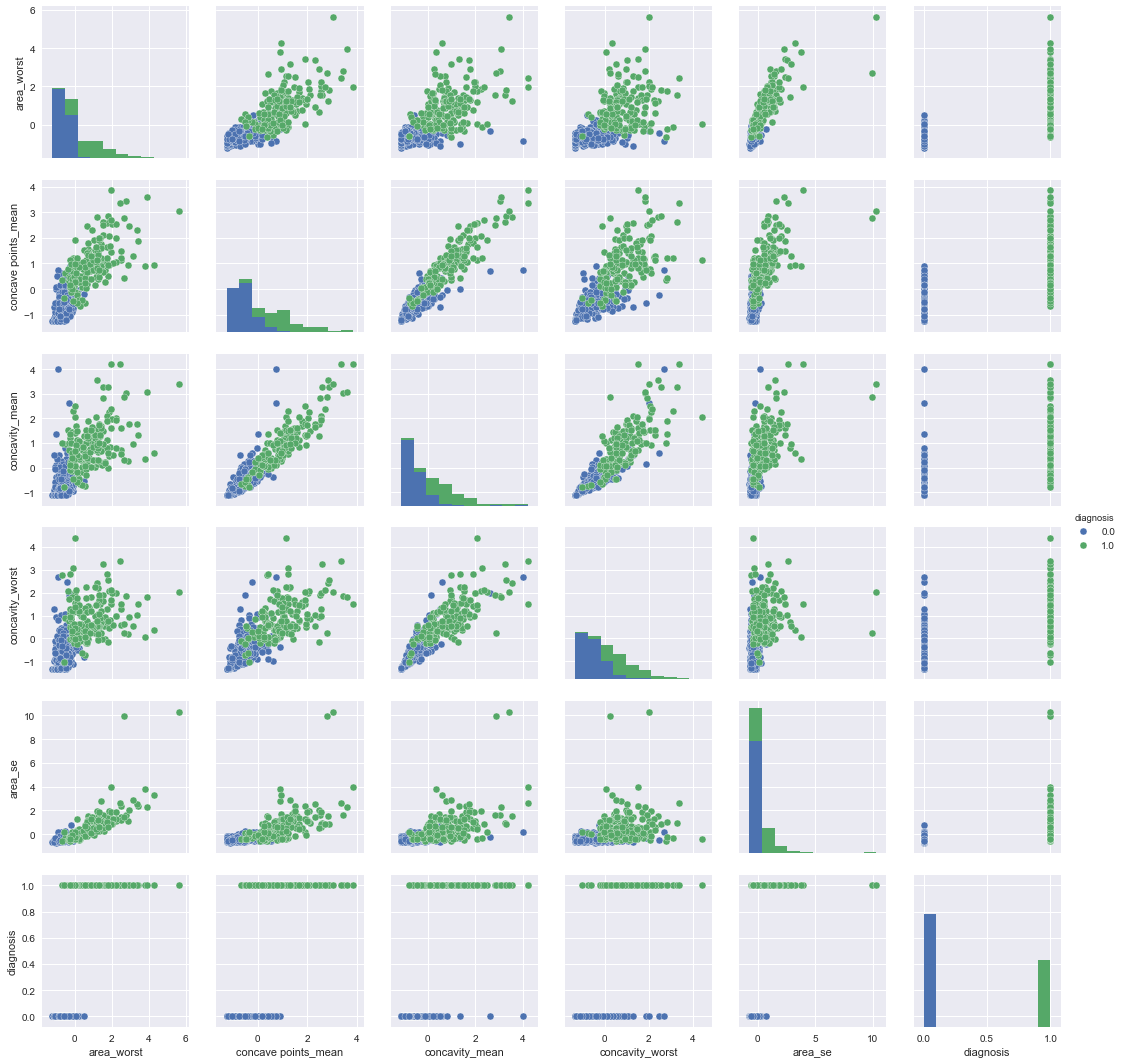

In [39]:
dataN = X_cv_N[['area_worst', 'concave points_mean', 'concavity_mean', 'concavity_worst', 'area_se']]
dataN = pd.DataFrame(np.concatenate((dataN.values,y_cv.values), axis=1), columns=np.concatenate((dataN.columns, 'diagnosis'), axis=None))
sns.pairplot(dataN, hue='diagnosis')

## 4- Prediction

### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=1)
X_pca = datas.filter(regex='^pca')
y_ = datas['diagnosis']
rfc.fit(X_pca, y_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

#### Fitting scaled test set to PCA and predicting

Remember to use same scaler and pca fits

In [43]:
X_pca3_test = pca.transform(X_test_N)
X_pca3_test = pd.DataFrame(X_pca3_test[:,:5], columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5'])

In [44]:
pred_rfc = rfc.predict(X_pca3_test)

In [45]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_rfc)

0.9298245614035088